In [354]:
import numpy as np
import matplotlib.pyplot as plt

In [355]:
epochs = 1000
lr = 0.1

In [356]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(pred_y, true_y):
    return 0.5 * np.sum(np.square(true_y - pred_y))

def cross_entropy_error(pred_y, true_y):
    if true_y.ndim == 1:
        true_y = true_y.reshape(1, -1)
        pred_y = pred_y.reshape(1, -1)
    
    delta = 1e-7
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_batch(pred_y, true_y):
    if true_y.ndim == 1:
        true_y = true_y.reshape(1, -1)
        pred_y = pred_y.reshape(1, -1)
    
    delta = 1e-7
    batch_size = pred_y.shape[0]
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def cross_entropy_error_for_bin(pred_y, true_y):
    return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1 - pred_y)))

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def differential(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val - eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        x[i] = temp_val

        return diff_value

In [357]:
class LogicGateNet():
    def __init__(self):
        def weight_init():
            weights = np.random.randn(2)
            bias = np.random.rand(1)

            return weights, bias
        
        self.weights, self.bias = weight_init()

    def predict(self, x):
        W = self.weights.reshape(-1, 1)
        b = self.bias

        pred_y = sigmoid(np.dot(x, W) + b)
        return pred_y
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    def get_gradient(self, x, t):
        def loss_gradient(grad):
            return self.loss(x, t)
        
        grad_W = differential(loss_gradient, self.weights)
        grad_B = differential(loss_gradient, self.bias)

        return grad_W, grad_B

In [358]:
AND = LogicGateNet()

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y = np.array([[0], [0], [0], [1]])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = AND.get_gradient(X, Y)
    
    AND.weights -= lr * grad_W
    AND.bias -= lr * grad_B

    loss = AND.loss(X, Y)
    train_loss_list.append(loss)

    if i % 100 == 99:
        print(f"Epoch: {i + 1}, Cost: {loss}, Weights: {AND.weights}, Bias: {AND.bias}")

Epoch: 100, Cost: 0.9353102082610878, Weights: [0.49359444 0.38367503], Bias: [-1.31335057]
Epoch: 200, Cost: 0.7584524060206939, Weights: [1.56550837 0.38367503], Bias: [-2.0665888]
Epoch: 300, Cost: 0.6982384679095585, Weights: [2.16561303 0.38367503], Bias: [-2.55016946]
Epoch: 400, Cost: 0.6700492707672188, Weights: [2.56656314 0.38367503], Bias: [-2.89537845]
Epoch: 500, Cost: 0.6541467749616434, Weights: [2.86339269 0.38367503], Bias: [-3.16048984]
Epoch: 600, Cost: 0.6440643109840762, Weights: [3.09751229 0.38367503], Bias: [-3.37441586]
Epoch: 700, Cost: 0.6371482261473591, Weights: [3.29013277 0.38367503], Bias: [-3.55315279]
Epoch: 800, Cost: 0.6321295991891833, Weights: [3.45341822 0.38367503], Bias: [-3.7063497]
Epoch: 900, Cost: 0.6283315275195259, Weights: [3.59493917 0.38367503], Bias: [-3.84022879]
Epoch: 1000, Cost: 0.6253621690290438, Weights: [3.71970611 0.38367503], Bias: [-3.95901754]


In [359]:
print(AND.predict(X))

[[0.01872455]
 [0.02724287]
 [0.44045605]
 [0.53602835]]


In [360]:
OR = LogicGateNet()
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
Y_2 = np.array([
    [0],
    [1],
    [1],
    [1],
])

train_loss_list = list()

for i in range(epochs):
    grad_W, grad_B = OR.get_gradient(X, Y_2)
    
    OR.weights -= lr * grad_W
    OR.bias -= lr * grad_B

    loss = OR.loss(X, Y_2)
    train_loss_list.append(loss)

    if i % 100 == 99:
        print(f"Epoch: {i + 1}, Cost: {loss}, Weights: {OR.weights}, Bias: {OR.bias}")

Epoch: 100, Cost: 1.103145776935949, Weights: [ 2.83588365 -1.21852888], Bias: [0.83278679]
Epoch: 200, Cost: 1.084245017616726, Weights: [ 3.26626215 -1.21852888], Bias: [0.79120481]
Epoch: 300, Cost: 1.0739680117743717, Weights: [ 3.58303257 -1.21852888], Bias: [0.74689525]
Epoch: 400, Cost: 1.0676207184290296, Weights: [ 3.83294391 -1.21852888], Bias: [0.71799597]
Epoch: 500, Cost: 1.0633650130928225, Weights: [ 4.03812317 -1.21852888], Bias: [0.69854621]
Epoch: 600, Cost: 1.060335589878352, Weights: [ 4.21151491 -1.21852888], Bias: [0.68473693]
Epoch: 700, Cost: 1.05807956854238, Weights: [ 4.36129794 -1.21852888], Bias: [0.67448681]
Epoch: 800, Cost: 1.0563396303270933, Weights: [ 4.49292698 -1.21852888], Bias: [0.66660574]
Epoch: 900, Cost: 1.054959797558123, Weights: [ 4.61020091 -1.21852888], Bias: [0.66037277]
Epoch: 1000, Cost: 1.0538404750834256, Weights: [ 4.71586121 -1.21852888], Bias: [0.65532859]


In [361]:
print(OR.predict(X))

[[0.65821024]
 [0.3628073 ]
 [0.99537291]
 [0.98452085]]


# 다중 클래스 분류

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

In [363]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [364]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

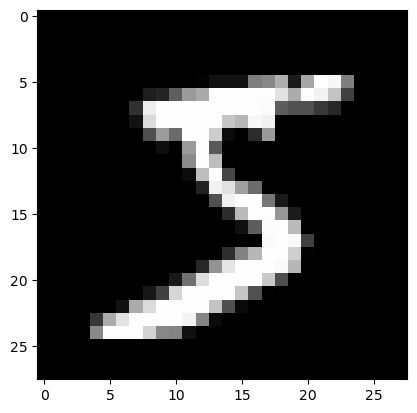

In [365]:
img = X_train[0]
plt.imshow(img, cmap="gray")
plt.show()

In [366]:
y_train[0]

5

In [367]:
def flatten_for_mnist(x):
    temp = np.zeros((x.shape[0], x[0].size))

    for idx, data in enumerate(x):
        temp[idx, :] = data.flatten()

    return temp

In [368]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # Normalization

X_train = flatten_for_mnist(X_train)
X_test = flatten_for_mnist(X_test)

print(X_train.shape)
print(X_test.shape)

y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [369]:
print(X_train[0].max(), X_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [370]:
epochs = 100
lr = 0.01
batch_size = 100
train_size = X_train.shape[0]

In [371]:
def differential_1d(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]
        
        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val - eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        x[i] = temp_val

        return diff_value

def differential_2d(f, X):
    if X.ndim == 1:
        return differential_1d(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = differential_1d(f, x)
        return grad

In [372]:
class MyModel():
    def __init__(self):
        def weight_init(input_nodes, hidden_nodes, output_units):
            np.random.seed(42)
            params = {
                "w_1": 0.01 * np.random.randn(input_nodes, hidden_nodes),
                "b_1": np.zeros(hidden_nodes),
                "w_2": 0.01 * np.random.randn(hidden_nodes, output_units),
                "b_2": np.zeros(output_units)
            }
            return params
        
        self.params = weight_init(784, 64, 10)
    
    def predict(self, x):
        W_1, W_2 = self.params["w_1"], self.params["w_2"]
        B_1, B_2 = self.params["b_1"], self.params["b_2"]

        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)
        A2 = np.dot(Z1, W_2) + B_2
        Z2 = sigmoid(A2)

        pred_y = softmax(Z2)
        return  pred_y
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        y_argmax = np.argmax(pred_y, axis=1)
        t_argmax = np.argmax(true_y, axis=1)

        acc = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        return acc
    
    def get_gradient(self, x, t):
        def loss_grad(grad):
            return self.loss(x, t)
        grads = {
            "w_1": differential_2d(loss_grad, self.params["w_1"]),
            "b_1": differential_2d(loss_grad, self.params["b_1"]),
            "w_2": differential_2d(loss_grad, self.params["w_2"]),
            "b_2": differential_2d(loss_grad, self.params["b_2"]),
        }
        return grads

In [373]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):
    batch_idx = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]

    grads = model.get_gradient(X_batch, y_batch)

    for key in grads.keys():
        model.params[key] -= lr * grads[key]

    loss = model.loss(X_batch, y_batch)
    train_loss_list.append(loss)

    train_acc = model.accuracy(X_train, y_train_ohe)
    test_acc = model.accuracy(X_test, y_test_ohe)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f"Epoch: {i + 1}, Cost: {loss}, Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

end_time = time.time()
print(f"총 학습 소요 시간: {end_time - start_time:.3f}")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1, Cost: 345.7882795108326, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 2, Cost: 345.3656281343124, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 3, Cost: 344.89663220872256, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 4, Cost: 345.87576991254525, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 5, Cost: 344.71745537165873, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 6, Cost: 344.9019056444622, Train Accuracy: 0.09871666666666666, Test Accuracy: 0.098
Epoch: 7, Cost: 345.9070647053219, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 8, Cost: 345.85956725984806, Train Accuracy: 0.09871666666666666, Test Accuracy: 0.098
Epoch: 9, Cost: 345.7109176177871, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 10, Cost: 345.5806498744463, Train Accuracy: 0.11236666666666667, Test Accuracy: 0.1135
Epoch: 11, Cost: 345.35710075405854, Train Accuracy: 0.11